In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [32]:
# Parameters (dimensionless for demonstration)
a = 1       # Minimum radius (e.g., DNA radius)
R = 1000      # Maximum radius
T_values = np.arange(1.111, 273, 0.5)
x_values = 1 / T_values  # x = βe²n (varying with temperature)

# Generate r values from a to R
r = np.linspace(a, R, 1000)

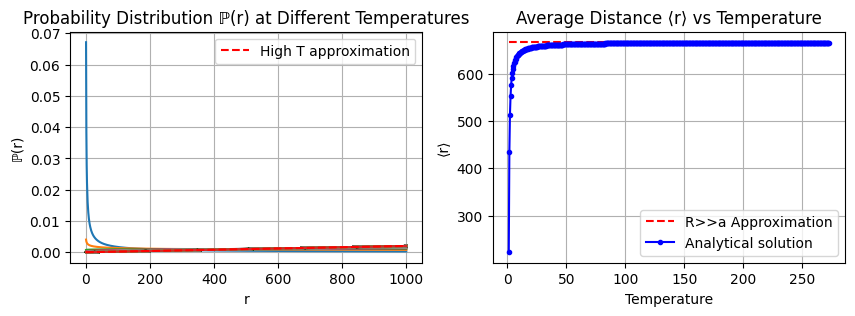

<Figure size 1000x600 with 0 Axes>

In [36]:
fig, (ax1, ax2) = plt.subplots(nrows=1, ncols=2, figsize=(10, 3))

# Plot Probability Distribution ℙ(r) for different temperatures
plt.figure(figsize=(10, 6))
for T, x in zip(T_values, x_values):
    denominator = R**(2*(1 - x)) - a**(2*(1 - x))
    P_r = 2*(1 - x) * (r**(1 - 2*x)) / denominator
    ax1.plot(r, P_r)

ax1.plot(r, 2*r/R**2, "r--", label='High T approximation')

ax1.set_xlabel('r')
ax1.set_ylabel('ℙ(r)')
ax1.set_title('Probability Distribution ℙ(r) at Different Temperatures')
ax1.legend()
ax1.grid(True)

# Compute and Plot Average ⟨r⟩ as a function of Temperature
avg_r = []
for x in x_values:
    numerator = (2 - 2*x) * (R**(3 - 2*x) - a**(3 - 2*x))
    denominator = (3 - 2*x) * (R**(2 - 2*x) - a**(2 - 2*x))
    avg_r.append(numerator / denominator)

ax2.plot(T_values, R * 2/3 * np.ones(np.shape(T_values)), 'r--', markersize=8, label="R>>a Approximation")
ax2.plot(T_values, avg_r, 'bo-', markersize=3, label="Analytical solution")
ax2.set_xlabel('Temperature')
ax2.set_ylabel('⟨r⟩')
ax2.legend()
ax2.set_title('Average Distance ⟨r⟩ vs Temperature')
ax2.grid(True)

plt.show()